In [41]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import sklearn as sk
from sklearn.model_selection import train_test_split
import random
from scipy import stats
from scipy.stats import norm
from scipy.stats import pearsonr
import math
#invite people for the Kaggle party
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


# Used Class and function
import numpy as np
from scipy import stats

import scipy
import scipy.stats

import matplotlib
import matplotlib.pyplot as plt
class Distribution(object):
    
    def __init__(self,dist_names_list = []):
        self.dist_names = ['expon']
        self.dist_results = []
        self.params = {}
        
        self.DistributionName = ""
        self.PValue = 0
        self.Param = None
        
        self.isFitted = False
        
        
    def Fit(self, y):
        self.dist_results = []
        self.params = {}
        for dist_name in self.dist_names:
            dist = getattr(scipy.stats, dist_name)
            param = dist.fit(y)
            
            self.params[dist_name] = param
            #Applying the Kolmogorov-Smirnov test
            D, p = scipy.stats.kstest(y, dist_name, args=param);
            self.dist_results.append((dist_name,p))

        #select the best fitted distribution
        sel_dist,p = (max(self.dist_results,key=lambda item:item[1]))
        #store the name of the best fit and its p value
        self.DistributionName = sel_dist
        self.PValue = p
        
        self.isFitted = True
        return self.DistributionName,self.PValue
    
    def Random(self, n = 1):
        if self.isFitted:
            dist_name = self.DistributionName
            param = self.params[dist_name]
            #initiate the scipy distribution
            dist = getattr(scipy.stats, dist_name)
            return dist.rvs(*param[:-2], loc=param[-2], scale=param[-1], size=n)
        else:
            raise ValueError('Must first run the Fit method.')
            
    def Plot(self,y):
        x = self.Random(n=len(y))
        plt.hist(x, alpha=0.5, label='Fitted')
        plt.hist(y, alpha=0.5, label='Actual')
        plt.legend(loc='upper right')
        
        
def pearsonr_ci(x,y,alpha=0.05):
    ''' calculate Pearson correlation along with the confidence interval using scipy and numpy
    Parameters
    ----------
    x, y : iterable object such as a list or np.array
      Input for correlation calculation
    alpha : float
      Significance level. 0.05 by default
    Returns
    -------
    r : float
      Pearson's correlation coefficient
    pval : float
      The corresponding p value
    lo, hi : float
      The lower and upper bound of confidence intervals
    '''

    r, p = stats.pearsonr(x,y)
    r_z = np.arctanh(r)
    se = 1/np.sqrt(x.size-3)
    z = stats.norm.ppf(1-alpha/2)
    lo_z, hi_z = r_z-z*se, r_z+z*se
    lo, hi = np.tanh((lo_z, hi_z))
    return r, p, lo, hi



### 1 . Using R, generate a random variable X that has 10,000 random uniform numbers from 1 to N, where N can be any number of your choosing greater than or equal to 6.  Then generate a random variable Y that has 10,000 random normal numbers with a mean of ny=sigme=(N+1)/2.  

In [46]:

N = 6
size= 10000

def startTheGame(n):
    mylist=[random.randint(1, 6) for _ in range(n)]
    return mylist


X = startTheGame(size)

# Generate a random variable Y

mu, sigma =(N+1)/2 , (N+1)/2 # mean and standard deviation
Y= np.random.normal(mu, sigma, size)



In [47]:
[print(X[i]) for i in range(6)]
[print(Y[i]) for i in range(6)]


1
1
2
1
4
1
4.597624674587182
3.008802093120073
-1.7622610451347809
3.9540413569331845
4.419330646461274
10.368287315106167


[None, None, None, None, None, None]

In [48]:
from statistics import median
from statistics import mean

import statistics 

#### a. P(X>x | X>y) = 0.594
Here we evaluate what the probability is of X being greater than it’s median value x if we know that X is already greater than Y’s first quartile y.

We need to find $$P(X > x | X > y) = \frac{P(X > x \text{ and } X > y)}{P(X > y)}$$


In [49]:
# first calculate x and y
x = median(X)

# This function is the same as the median if q=0.5, the same as the minimum if q=0.0 and the same as the maximum if q=1.0.
y = np.quantile(np.array(Y),0.25)


#p(A|B) = P(AB)/P(B)
pXxy = np.sum((np.array(X)>x) & (np.array(X)>y))
pXy = np.sum(np.array(X)>y)
pXxy/pXy

0.5940057775637939

In [50]:
np.sum((np.array(X)>x) & (np.array(X)>y))

4935

In [51]:
np.sum(np.array(X)>y)

8308

#### b. P(X>x, Y>y) = 0.3701

$$ P(X > x) \text{ and } P(Y>y) =  P(X > x) * P(Y>y)  $$

In [52]:
pXx = np.sum((np.array(X)>x))/size 
pYy = np.sum((np.array(Y)>y)) /size 

# probability of X>x = 
pXx
# probability of Y>y = 
pYy

pXx *pYy



0.370125

#### c. $P(X<x | X>y)$  = 0.198

Similar to “a” above, we are evaluating a conditional probablity. Given X above Y’s first quartile, what is the probability of X being below it’s own median, x?

In [54]:
#p(A|B) = P(AB)/P(B)
pXx = np.sum(  (np.array(X)<x) & (np.array(X)>y))
pXy = np.sum(np.array(X)>y)
pXx/pXy

0.1982426576793452

The probability of X less than median value of X given that X is greater than first quartile of y is 0.204

### 2 .Investigate whether $P(X>x and Y>y)=P(X>x)P(Y>y)$ by building a table and evaluating the marginal and joint probabilities.

In [56]:
pXx = np.sum((np.array(X)>x) & (np.array(Y)<y))/size 
pxX = np.sum((np.array(X)<x)& (np.array(Y)<y))/size 
pxeX = np.sum((np.array(X)==x)& (np.array(Y)<y))/size 

pXxY = np.sum((np.array(X)>x) & (np.array(Y)>y))/size 
pxXY = np.sum((np.array(X)<x)& (np.array(Y)>y))/size 
pxeXY = np.sum((np.array(X)==x)& (np.array(Y)>y))/size 

pXxYe = np.sum((np.array(X)>x) & (np.array(Y)==y))/size 
pxXYe = np.sum((np.array(X)<x)& (np.array(Y)==y))/size 
pxeXYe = np.sum((np.array(X)==x)& (np.array(Y)==y))/size 

pXx,pxX,pxeX,pXxY,pxXY,pxeXY,pXxYe,pxXYe,pxeXYe

(0.1222, 0.0837, 0.0441, 0.3713, 0.2502, 0.1285, 0.0, 0.0, 0.0)

In [57]:
pXx = np.sum((np.array(X)>x) & (np.array(Y)<y)) 
pxX = np.sum((np.array(X)<x)& (np.array(Y)<y)) 
pxeX = np.sum((np.array(X)==x)& (np.array(Y)<y)) 

pXxY = np.sum((np.array(X)>x) & (np.array(Y)>y)) 
pxXY = np.sum((np.array(X)<x)& (np.array(Y)>y))
pxeXY = np.sum((np.array(X)==x)& (np.array(Y)>y))

pXxYe = np.sum((np.array(X)>x) & (np.array(Y)==y))
pxXYe = np.sum((np.array(X)<x)& (np.array(Y)==y))
pxeXYe = np.sum((np.array(X)==x)& (np.array(Y)==y))

pXx,pxX,pxeX,pXxY,pxXY,pxeXY,pXxYe,pxXYe,pxeXYe

(1222, 837, 441, 3713, 2502, 1285, 0, 0, 0)

|       | Y<y    | Y>y    | Y=y | Total  |
|-------|--------|--------|-----|--------|
| X>x   | 0.1222 | <b> 0.3713<b> | 0   | 0.4935 |
| X<x   | 0.0837 | 0.2502 | 0   | 0.3339 |
| X=x   | 0.0441 | 0.1285 | 0   | 0.1726 |
| Total | 0.25   | 0.75   | 0   | 1      |


|       | Y<y  | Y>y  | Y=y | Total |
|-------|------|------|-----|-------|
| X>x   | 1222 | 3713 | 0   | 4935  |
| X<x   | 837  | 2502 | 0   | 3339  |
| X=x   | 441  | 1285 | 0   | 1726  |
| Total | 2500 | 7500 | 0   | 10000 |

we can see that the condition holds since P(X>x and Y>y) = 0.37 and P(X>x)P(Y>y) = 0.4935 *0.4935 = 0.370125 are approximately equal.

we can see that the condition holds since P(X>x and Y>y) = 3713 and P(X>x)P(Y>y) = 4935/size * 7500/size  = 0.370125 are approximately equal.

### 3. Check to see if independence holds by using Fisherâs Exact Test and the Chi Square Test. What is the difference between the two? Which is most appropriate?

Ho: Variable A and Variable B are independent. <br>
H1: Variable A and Variable B are not independent.

In [76]:
from scipy.stats import fisher_exact

pXxYy,pXxyY= 1222,3713
pxXYy,pxXyY = 837,2502

oddsratio, pvalue = fisher_exact([[pXxYy, pXxyY], [pxXYy, pxXyY]])
print('Fisher exact test p-value: {:.4f}'.format(pvalue))


Fisher exact test p-value: 0.7559


The p-value is  statistically insignificant  and far from 0.01 so we may reject the null hypothesis of independence.

In [82]:
from scipy import stats

dataEvent = np.array([np.array([pXxYy,pXxyY]),np.array([pxXYy,pxXyY])])
stats.chi2_contingency(dataEvent)

(0.08375262197332685,
 0.7722749486730806,
 1,
 array([[1228.08375635, 3706.91624365],
        [ 830.91624365, 2508.08375635]]))

In [83]:
chi2_stat, p_val, dof, ex = stats.chi2_contingency(dataEvent)
print("===Chi2 Stat===")
print(chi2_stat)
print("\n")
print("===Degrees of Freedom===")
print(dof)
print("\n")
print("===P-Value===")
print(p_val)
print("\n")
print("===Contingency Table===")
print(ex)

===Chi2 Stat===
0.08375262197332685


===Degrees of Freedom===
1


===P-Value===
0.7722749486730806


===Contingency Table===
[[1228.08375635 3706.91624365]
 [ 830.91624365 2508.08375635]]


here P-value is far from 0.01, The results again shows that p-value is not significant and rejecting the null hypothesis of independence. 

In this case it makes sense since we had our data dependancy on X and Y. 

#### Descriptive and Inferential Statistics.
Provide `univariate` descriptive statistics and appropriate plots for the training data set.  Provide a `scatterplot matrix` for at least two of the independent variables and the `dependent variable`. Derive a `correlation matrix for any three quantitative variables` in the dataset.  <br>Test the hypotheses that the correlations between each pairwise set of variables is 0 and provide an 80% confidence interval.  Discuss the meaning of your analysis.  Would you be worried about familywise error? Why or why not?

<b>Univariable study: </b> Lets study dependent variable (`SalePrice`) <br>
Dependent variable : TotalBsmtSF
Independent variable : `SalePrice`
We will focus on following variables in this assignemnt :<br>
    `OverallQual` => Categorical <br>
    `YearBuilt`=> Categorical<br>
    `TotalBsmtSF`=> Quantitative <br>
    `GrLivArea`=> Quantitative<br>
    `GarageArea`=>Quantitative<br>

In [119]:
train = "https://raw.githubusercontent.com/Rajwantmishra/msds/master/605/train.csv"
test = "https://raw.githubusercontent.com/Rajwantmishra/msds/master/605/test.csv"
dataTrain = pd.read_csv(train)
dataTest = pd.read_csv(test)

In [3]:
dataTrain.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
dataTest.head(4)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal


In [3]:
x = dataTrain.loc[:,:"SalePrice"]

In [4]:
y =  dataTrain["SalePrice"]

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.33,random_state=1)

#### Descriptive statistics summary 

In [8]:
dataTrain.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [9]:
#check the decoration
dataTrain.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

#### Data fields
Here's a brief version of what you'll find in the data description file.
<ul>
<li><strong>SalePrice</strong> - the property's sale price in dollars. This is the target variable that you're trying to predict.</li>
<li><strong>MSSubClass</strong>: The building class</li>
<li><strong>MSZoning</strong>: The general zoning classification</li>
<li><strong>LotFrontage</strong>: Linear feet of street connected to property</li>
<li><strong>LotArea</strong>: Lot size in square feet</li>
<li><strong>Street</strong>: Type of road access</li>
<li><strong>Alley</strong>: Type of alley access</li>
<li><strong>LotShape</strong>: General shape of property</li>
<li><strong>LandContour</strong>: Flatness of the property</li>
<li><strong>Utilities</strong>: Type of utilities available</li>
<li><strong>LotConfig</strong>: Lot configuration</li>
<li><strong>LandSlope</strong>: Slope of property</li>
<li><strong>Neighborhood</strong>: Physical locations within Ames city limits</li>
<li><strong>Condition1</strong>: Proximity to main road or railroad</li>
<li><strong>Condition2</strong>: Proximity to main road or railroad (if a second is present)</li>
<li><strong>BldgType</strong>: Type of dwelling</li>
<li><strong>HouseStyle</strong>: Style of dwelling</li>
<li><strong>OverallQual</strong>: Overall material and finish quality</li>
<li><strong>OverallCond</strong>: Overall condition rating</li>
<li><strong>YearBuilt</strong>: Original construction date</li>
<li><strong>YearRemodAdd</strong>: Remodel date</li>
<li><strong>RoofStyle</strong>: Type of roof</li>
<li><strong>RoofMatl</strong>: Roof material</li>
<li><strong>Exterior1st</strong>: Exterior covering on house</li>
<li><strong>Exterior2nd</strong>: Exterior covering on house (if more than one material)</li>
<li><strong>MasVnrType</strong>: Masonry veneer type</li>
<li><strong>MasVnrArea</strong>: Masonry veneer area in square feet</li>
<li><strong>ExterQual</strong>: Exterior material quality</li>
<li><strong>ExterCond</strong>: Present condition of the material on the exterior</li>
<li><strong>Foundation</strong>: Type of foundation</li>
<li><strong>BsmtQual</strong>: Height of the basement</li>
<li><strong>BsmtCond</strong>: General condition of the basement</li>
<li><strong>BsmtExposure</strong>: Walkout or garden level basement walls</li>
<li><strong>BsmtFinType1</strong>: Quality of basement finished area</li>
<li><strong>BsmtFinSF1</strong>: Type 1 finished square feet</li>
<li><strong>BsmtFinType2</strong>: Quality of second finished area (if present)</li>
<li><strong>BsmtFinSF2</strong>: Type 2 finished square feet</li>
<li><strong>BsmtUnfSF</strong>: Unfinished square feet of basement area</li>
<li><strong>TotalBsmtSF</strong>: Total square feet of basement area</li>
<li><strong>Heating</strong>: Type of heating</li>
<li><strong>HeatingQC</strong>: Heating quality and condition</li>
<li><strong>CentralAir</strong>: Central air conditioning</li>
<li><strong>Electrical</strong>: Electrical system</li>
<li><strong>1stFlrSF</strong>: First Floor square feet</li>
<li><strong>2ndFlrSF</strong>: Second floor square feet</li>
<li><strong>LowQualFinSF</strong>: Low quality finished square feet (all floors)</li>
<li><strong>GrLivArea</strong>: Above grade (ground) living area square feet</li>
<li><strong>BsmtFullBath</strong>: Basement full bathrooms</li>
<li><strong>BsmtHalfBath</strong>: Basement half bathrooms</li>
<li><strong>FullBath</strong>: Full bathrooms above grade</li>
<li><strong>HalfBath</strong>: Half baths above grade</li>
<li><strong>Bedroom</strong>: Number of bedrooms above basement level</li>
<li><strong>Kitchen</strong>: Number of kitchens</li>
<li><strong>KitchenQual</strong>: Kitchen quality</li>
<li><strong>TotRmsAbvGrd</strong>: Total rooms above grade (does not include bathrooms)</li>
<li><strong>Functional</strong>: Home functionality rating</li>
<li><strong>Fireplaces</strong>: Number of fireplaces</li>
<li><strong>FireplaceQu</strong>: Fireplace quality</li>
<li><strong>GarageType</strong>: Garage location</li>
<li><strong>GarageYrBlt</strong>: Year garage was built</li>
<li><strong>GarageFinish</strong>: Interior finish of the garage</li>
<li><strong>GarageCars</strong>: Size of garage in car capacity</li>
<li><strong>GarageArea</strong>: Size of garage in square feet</li>
<li><strong>GarageQual</strong>: Garage quality</li>
<li><strong>GarageCond</strong>: Garage condition</li>
<li><strong>PavedDrive</strong>: Paved driveway</li>
<li><strong>WoodDeckSF</strong>: Wood deck area in square feet</li>
<li><strong>OpenPorchSF</strong>: Open porch area in square feet</li>
<li><strong>EnclosedPorch</strong>: Enclosed porch area in square feet</li>
<li><strong>3SsnPorch</strong>: Three season porch area in square feet</li>
<li><strong>ScreenPorch</strong>: Screen porch area in square feet</li>
<li><strong>PoolArea</strong>: Pool area in square feet</li>
<li><strong>PoolQC</strong>: Pool quality</li>
<li><strong>Fence</strong>: Fence quality</li>
<li><strong>MiscFeature</strong>: Miscellaneous feature not covered in other categories</li>
<li><strong>MiscVal</strong>: $Value of miscellaneous feature</li>
<li><strong>MoSold</strong>: Month Sold</li>
<li><strong>YrSold</strong>: Year Sold</li>
<li><strong>SaleType</strong>: Type of sale</li>
<li><strong>SaleCondition</strong>: Condition of sale</li>
</ul>

Checking the statistical values for `SalePrice` , that is our dependent variable.

In [278]:

dataTrain['SalePrice'].describe()


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

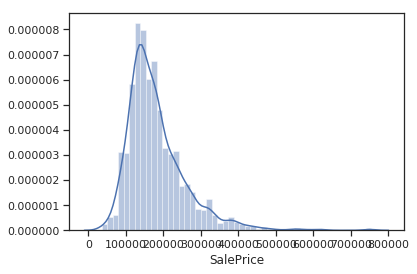

In [279]:
#histogram
sns.distplot(dataTrain['SalePrice']);

Above plot shows that data follows some skewness at the end , which is kind of valid in the case as its sales price and it tends to be skewing toward right for some of the high vlaue properties. 
<br>Below scatterplot <b>Sales Price v/s GrLivArea </b> also shows that data is very much in `high volume of property with close to 2.5k GrLivArea ` but this decreases as number of sales price increases. ``Very few outliers with area greater than 3k.``

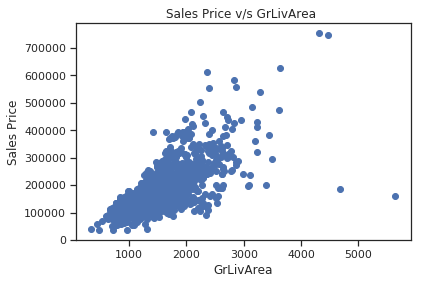

In [280]:
fig = plt.figure()
plt.ylabel('Sales Price')
plt.xlabel('GrLivArea')
plt.title('Sales Price v/s GrLivArea ')
plt.scatter(x= dataTrain['GrLivArea'],y=dataTrain['SalePrice'] )
plt.show()

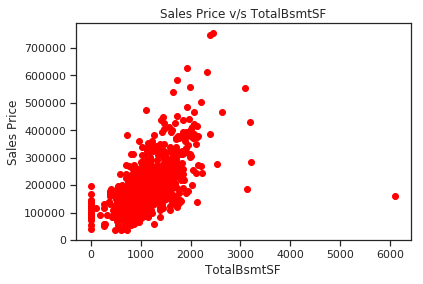

In [281]:
fig = plt.figure()
plt.ylabel('Sales Price')
plt.xlabel('TotalBsmtSF')
plt.title('Sales Price v/s TotalBsmtSF' )
plt.scatter(x= dataTrain['TotalBsmtSF'],y=dataTrain['SalePrice'], color='red' )
plt.show()

<b>Sales Price v/s TotalBsmtSF</b> seems to follow the same trend as shown in above plot, price is increasing as  TotalBsmtSF increases but with ``only one outliser where TotalBsmtSF is really close to 6k``. 

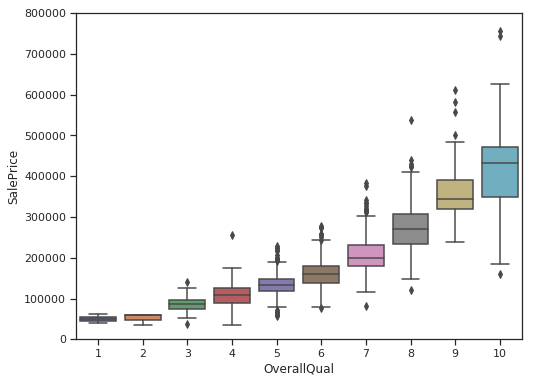

In [282]:
#box plot overallqual/saleprice
var = 'OverallQual'
data = pd.concat([dataTrain['SalePrice'], dataTrain[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

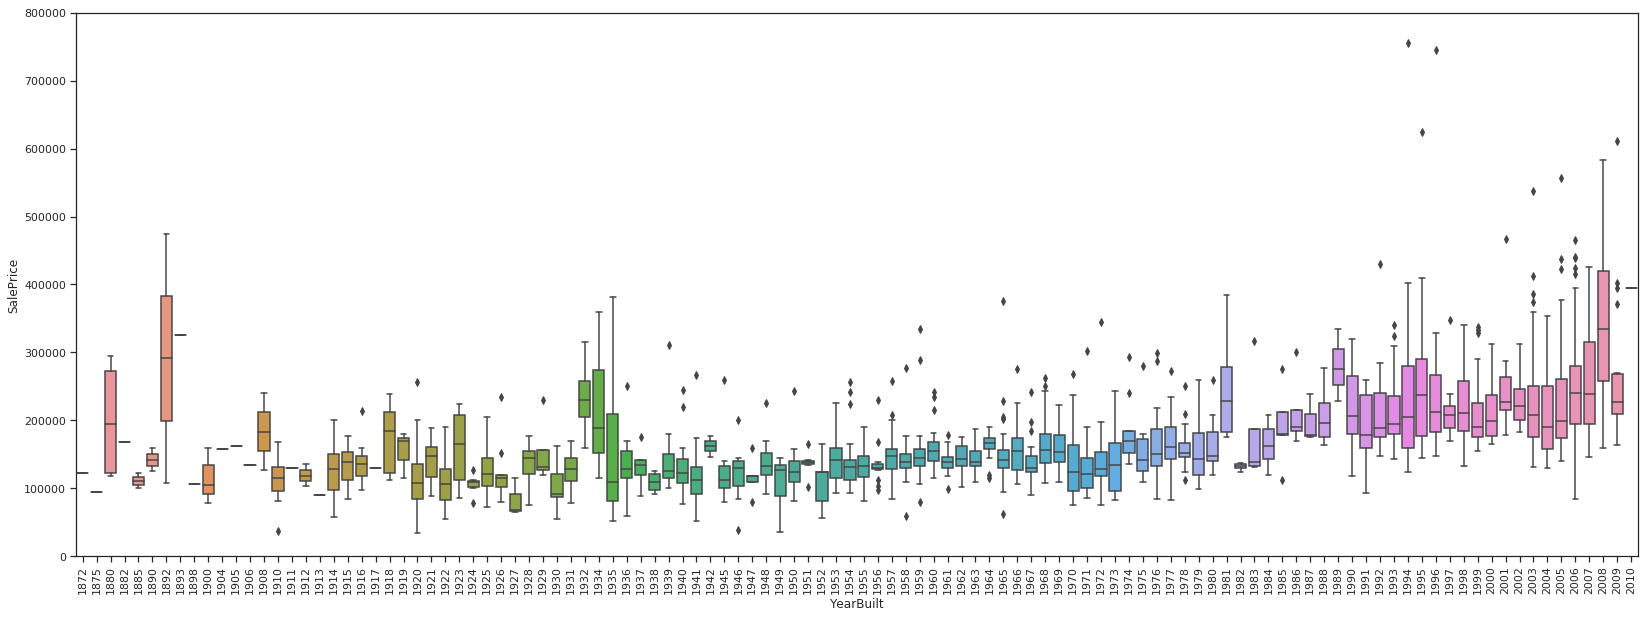

In [283]:
var = 'YearBuilt'
data = pd.concat([dataTrain['SalePrice'], dataTrain[var]], axis=1)
f, ax = plt.subplots(figsize=(28, 10))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

In summary by looking at the box plot of the year built and price, <b>it looks like there is always some outliers with higher price and in contrast there is not lower priced outliers after 1985.</b>

#### Correalation
`Derive a correlation matrix for any three quantitative variables in the dataset.` Test the hypotheses that the correlations between each pairwise set of variables is 0 and provide an 80% confidence interval. Discuss the meaning of your analysis. Would you be worried about familywise error? Why or why not?

We will use ['SalePrice','OverallQual','YearBuilt','TotalBsmtSF','GrLivArea','GarageCars', 'GarageArea', 'FullBath'] for our correlation analysis.

In [284]:
col2= ['SalePrice','OverallQual','YearBuilt','TotalBsmtSF','GrLivArea','GarageCars', 'GarageArea', 'FullBath']
dataTestCorr = dataTrain[col2]

dataTestCorr.head()

,SalePrice,OverallQual,YearBuilt,TotalBsmtSF,GrLivArea,GarageCars,GarageArea,FullBath
0,208500,7,2003,856,1710,2,548,2
1,181500,6,1976,1262,1262,2,460,2
2,223500,7,2001,920,1786,2,608,2
3,140000,7,1915,756,1717,3,642,1
4,250000,8,2000,1145,2198,3,836,2


In [285]:
dataTestCorr.describe()

,SalePrice,OverallQual,YearBuilt,TotalBsmtSF,GrLivArea,GarageCars,GarageArea,FullBath
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,180921.195890,6.099315,1971.267808,1057.429452,1515.463699,1.767123,472.980137,1.565068
std,79442.502883,1.382997,30.202904,438.705324,525.480383,0.747315,213.804841,0.550916
min,34900.000000,1.000000,1872.000000,0.000000,334.000000,0.000000,0.000000,0.000000
25%,129975.000000,5.000000,1954.000000,795.750000,1129.500000,1.000000,334.500000,1.000000
50%,163000.000000,6.000000,1973.000000,991.500000,1464.000000,2.000000,480.000000,2.000000
75%,214000.000000,7.000000,2000.000000,1298.250000,1776.750000,2.000000,576.000000,2.000000
max,755000.000000,10.000000,2010.000000,6110.000000,5642.000000,4.000000,1418.000000,3.000000


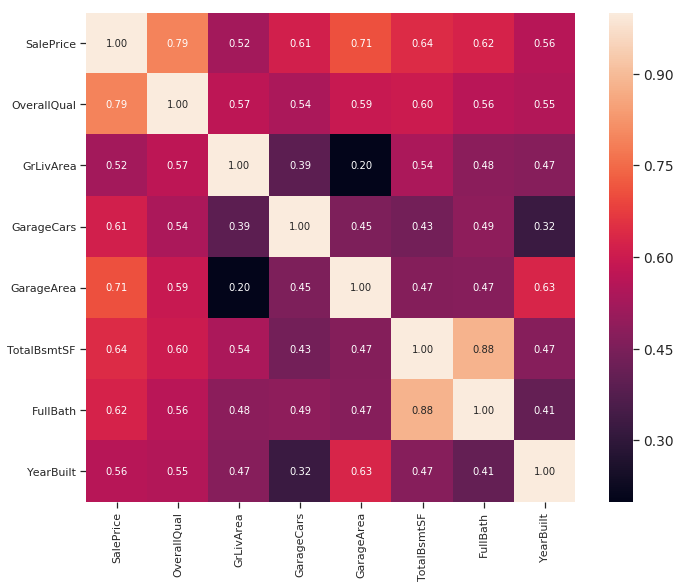

In [286]:
# Correlation matrix (heatmap style).
#correlation matrix
corrmat = dataTestCorr.corr()
f, ax = plt.subplots(figsize=(12, 9))
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(dataTestCorr.values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()


From the above matrix its very easy to see diagonally with all 1, which says that we are talkng about corelation with the variable itself. <br>
Other boxes with number close to 0 are not very less correlated and values close to 1 apart from same variables are very close correlated. <br>
From the above plot, Fullbath and TotalBsmtSf seems very good related to each other, but if we have to check for our Dependent variable `Salesprice` it seems very close related to OverallQual and GarageArea. 

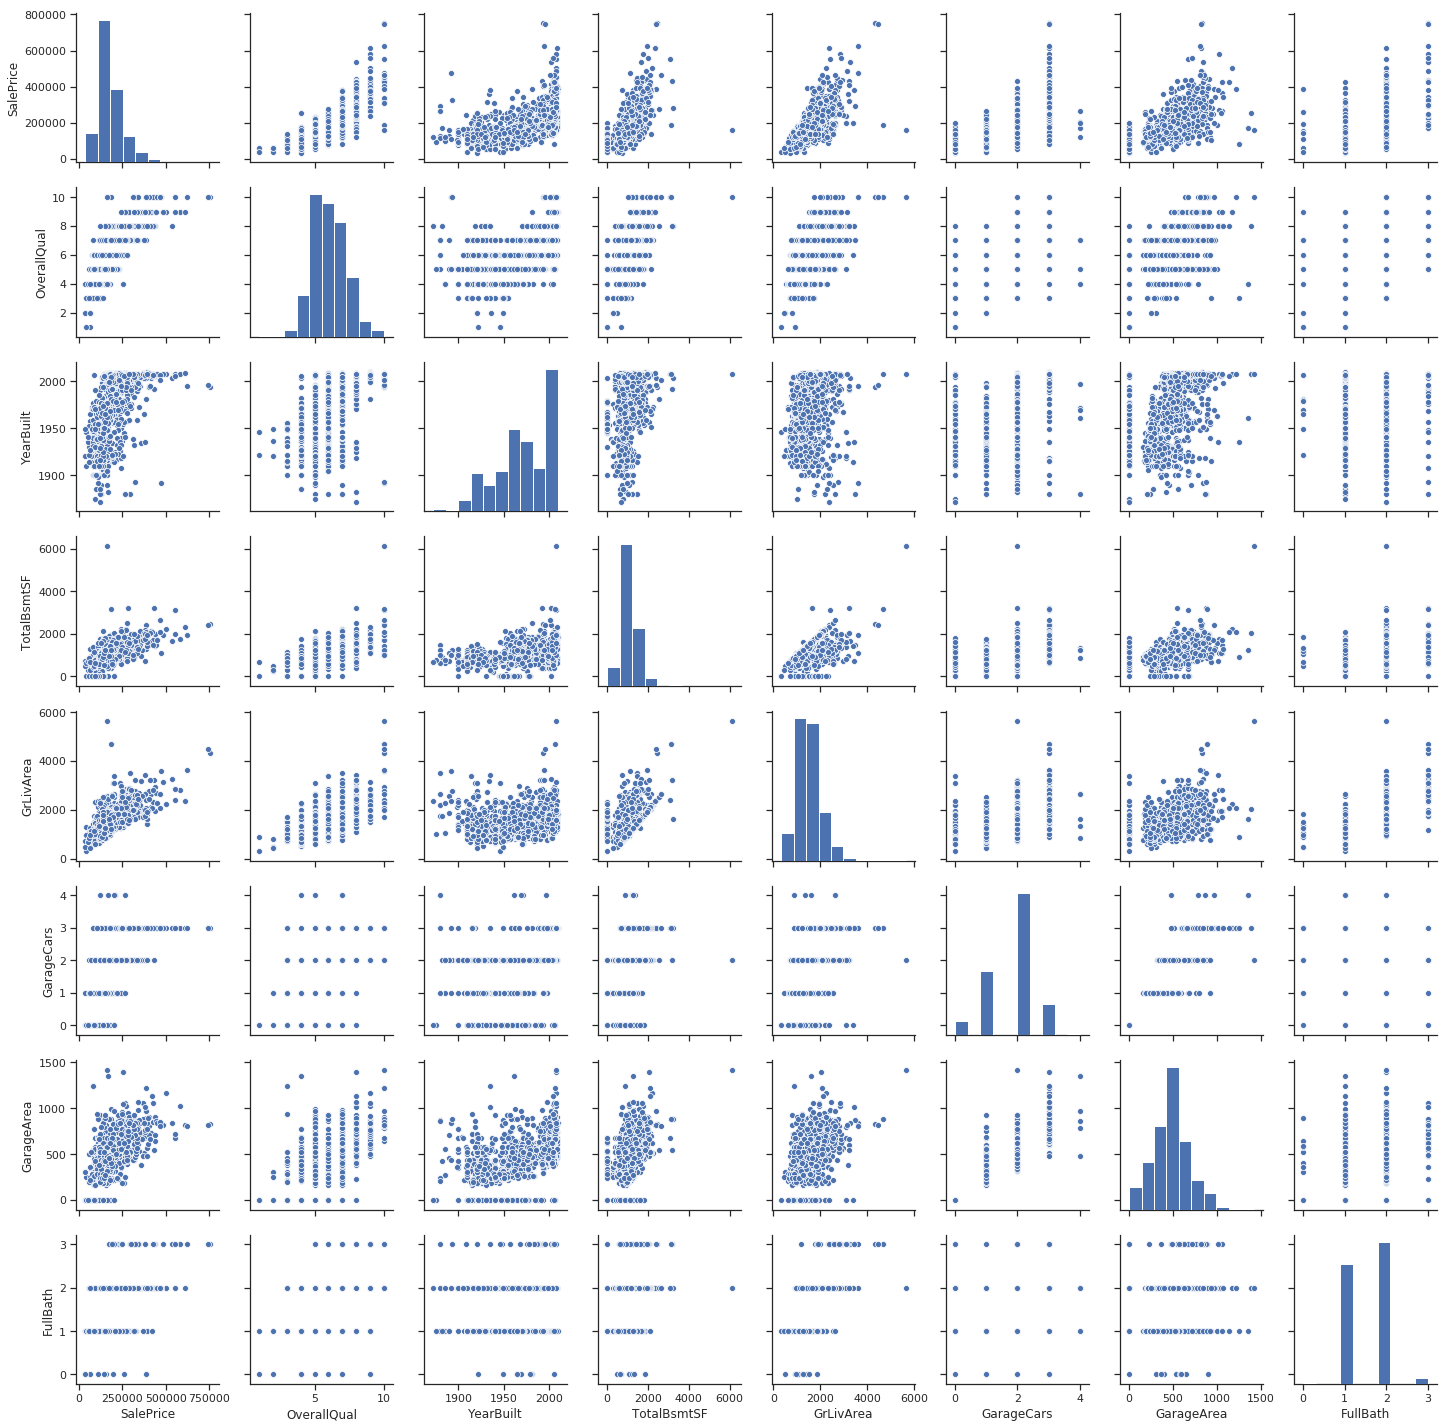

In [287]:
# corrmat.iloc[0,1]
sns.set(style="ticks")
sns.pairplot(dataTestCorr)

The pairs plot builds on two basic figures, the histogram and the scatter plot. The histogram on the diagonal allows us to see the distribution of a single variable while the scatter plots on the upper and lower triangles show the relationship (or lack thereof) between two variables. 

In [288]:

columns = np.full((corrmat.shape[0],), True, dtype=bool)
for i in range(corrmat.shape[0]):
    for j in range(i+1, corrmat.shape[0]):
        if corrmat.iloc[i,j] >= 0.8:
            if columns[j]:
                columns[j] = False
selected_columns = dataTestCorr.columns[columns]
corrdata = dataTrain[selected_columns ] 
corrdata.head()
# dataTestCorr[1:].values
# dataTestCorr.iloc[:,1:].values, dataTestCorr.iloc[:,0].values
# dataTestCorr.iloc[:,0].head(),corrmat.iloc[0,1]
# columns, dataTestCorr.columns[columns],selected_columns
# dataTestCorr.columns[columns],columns,col2 ,dataTestCorr.head()



,SalePrice,OverallQual,YearBuilt,TotalBsmtSF,GrLivArea,GarageCars,FullBath
0,208500,7,2003,856,1710,2,2
1,181500,6,1976,1262,1262,2,2
2,223500,7,2001,920,1786,2,2
3,140000,7,1915,756,1717,3,1
4,250000,8,2000,1145,2198,3,2


ABove we compare the correlation between features and remove one of two features that have a correlation higher than 0.8.

<b>H0 =  Null hypothesis : </b>That there is no correlation  between two measured variable i.e. `SalePrice` and `TotalBsmtSF`. <br>
<b>H1=  Alternative  hypothesis :</b> That there is some correlation  between two measured variable i.e. `SalePrice` and `TotalBsmtSF`.

In [289]:
from scipy.stats.stats import pearsonr
# 'SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
pearsonr_ci(corrdata['SalePrice'],corrdata['TotalBsmtSF'],.20)

# from scipy.stats import linregress
# linregress(corrdata['SalePrice'],corrdata['TotalBsmtSF'])

(0.6135805515591953,
 9.484229391503079e-152,
 0.5922142432791334,
 0.6340846325709248)

Since correlation = 0.63 and p-Value less than 0.05 `we reject the null hypothesis` and conclude that the  there is some correlation between TotalBsmtSF and SalePrice .
80 percent confidence interval of the test is 0.5922, and  0.6341

<b>H0=  Null hypothesis :</b> That there is no correlation  between two measured variable i.e. `GrLivArea` and `TotalBsmtSF`. <br>
<b>H1=  Alternative  hypothesis :</b> That there is some correlation  between two measured variable i.e. `GrLivArea` and `TotalBsmtSF`.

In [290]:
pearsonr_ci(corrdata['GrLivArea'], corrdata['TotalBsmtSF'],  0.2)

(0.454868202547903,
 1.8578698786045413e-75,
 0.42783799020595825,
 0.48108553139407345)

Since correlation = 0.45 and p-Value less than 0.05 ``we reject the null hypothesis`` and conclude that the  there is some correlation between TotalBsmtSF and GrLivArea .
80 percent confidence interval of the test is 0.4278, and  0.4810


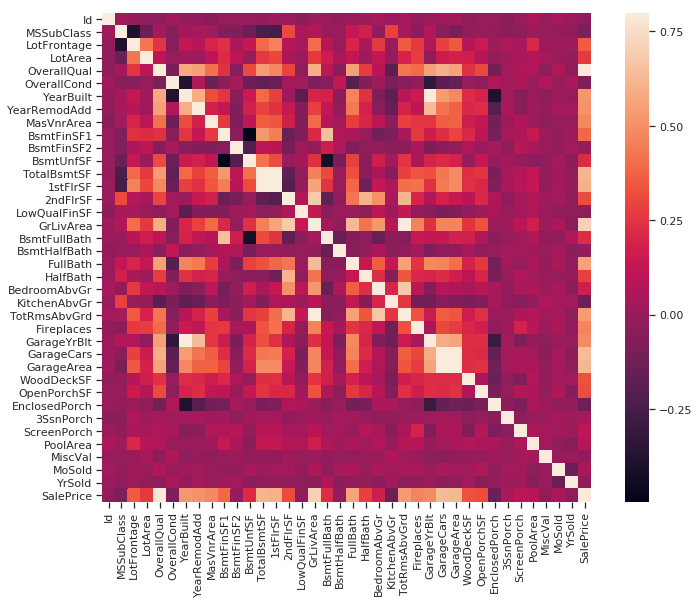

In [291]:
# Correlation matrix (heatmap style).
#correlation matrix
corrmat = dataTrain.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

According to our crystal ball, these are the variables most correlated with 'SalePrice'. We will use few of the listed varaibles for our model.['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt','LotArea']

Lets see how the scatterplot matrix looks:

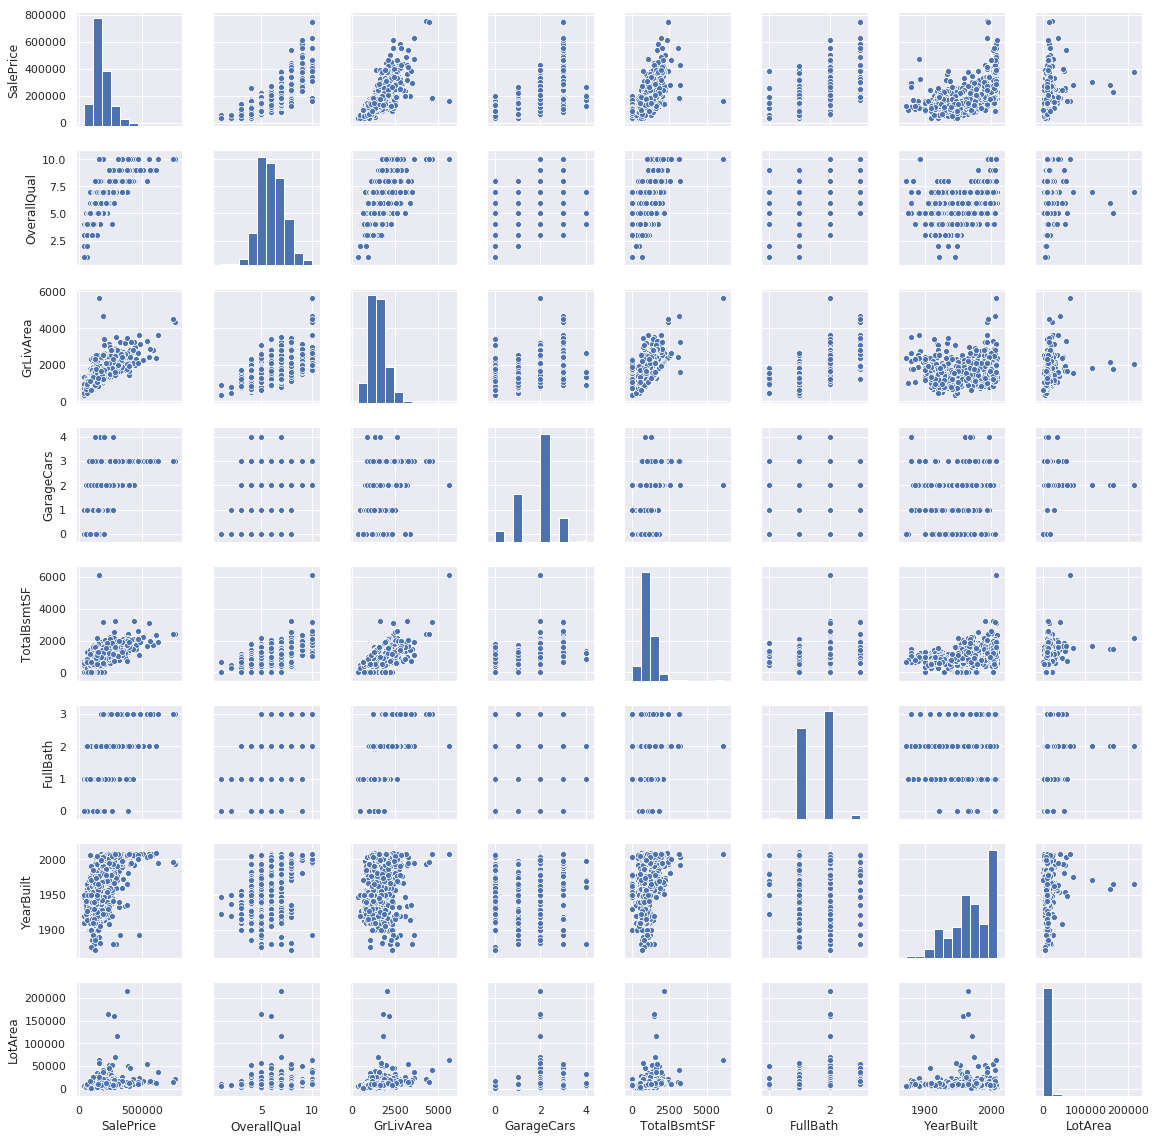

In [292]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt','LotArea']
sns.pairplot(dataTrain[cols], size = 2)
plt.show();


 

##### Calculus-Based Probability & Statistics.  
Many times, it makes sense to fit a closed form distribution to data.  Select a variable in the Kaggle.com training dataset that is skewed to the right, shift it so that the minimum value is absolutely above zero if necessary.  Then load the MASS package and run fitdistr to fit an exponential probability density function.  (See  https://stat.ethz.ch/R-manual/R-devel/library/MASS/html/fitdistr.html ).  Find the optimal value of  for this distribution, and then take 1000 samples from this exponential distribution using this value (e.g., rexp(1000, )).  Plot a histogram and compare it with a histogram of your original variable.   Using the exponential pdf, find the 5th and 95th percentiles using the cumulative distribution function (CDF).   Also generate a 95% confidence interval from the empirical data, assuming normality.  Finally, provide the empirical 5th percentile and 95th percentile of the data.  Discuss.


We will use `GrLivArea` as its data is skewed right.

(<matplotlib.axes._subplots.AxesSubplot at 0x7faab4a4ec50>,
 count    1460.000000
 mean     1515.463699
 std       525.480383
 min       334.000000
 25%      1129.500000
 50%      1464.000000
 75%      1776.750000
 max      5642.000000
 Name: GrLivArea, dtype: float64)

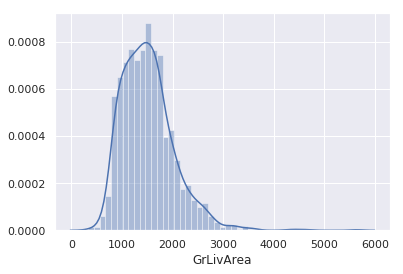

In [293]:
sns.distplot(dataTrain['GrLivArea']),dataTrain['GrLivArea'].describe()

In [294]:
import matplotlib.pyplot as plt
import scipy
import scipy.stats
from scipy.stats import expon
from numpy import linspace
from pylab import plot,show,hist,figure,title

x = dataTrain['GrLivArea']

param = expon.fit(dataTrain['GrLivArea']) # distribution fitting

# now, param[0] and param[1] are the mean and 
# the standard deviation of the fitted distribution

# fitted distribution
pdf_fitted = expon.pdf(x,loc=param[0],scale=param[1])
# original distribution
pdf = expon.pdf(x)

# # x = linspace(-5,5,1000)
# # fitted distribution
# pdf_fitted = expon.pdf(x,loc=param[0],scale=param[1])
# # original distribution
# pdf = expon.pdf(x)

# title('Normal distribution')
# plot(pdf_fitted,'r-',x,pdf,'b-')
# hist(dataTrain,normed=1,alpha=.3)
# show()

#standard deviation
pdf_fitted.std()

0.00012708134133441478

In [295]:
x = dataTrain['GrLivArea']
dist = getattr(scipy.stats, 'expon')
param = dist.fit(x)  
# self.params[dist_name] = param
    #Applying the Kolmogorov-Smirnov test
D, p = scipy.stats.kstest(x, 'expon', args=param);
D, p


(0.3061946635425703, 0.0)

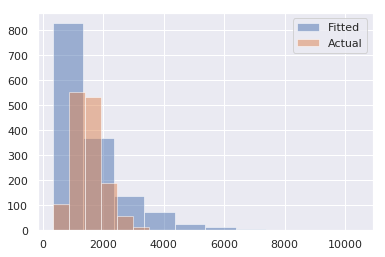

In [296]:
from scipy.stats import expon
x = dataTrain['GrLivArea']
dst = Distribution()
dst.Fit(x)
dst.Plot(x)


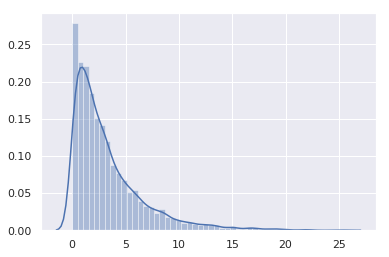

In [297]:
# A common parameterization for expon is in terms of the rate parameter lambda, 
# such that pdf = lambda * exp(-lambda * x). This parameterization corresponds to using scale = 1 / lambda.
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html
r = expon.rvs(size=5000,scale = 1/D ) #exponential

# Generated Data's Distribution
sns.distplot(r)


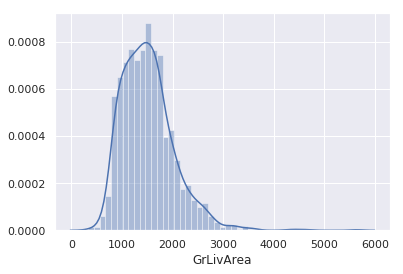

In [298]:
# Actual data Distribution
sns.distplot(dataTrain['GrLivArea']) 

## Regression
#### 10 points.  
Modeling.  Build some type of multiple regression  model and submit your model to the competition board.  Provide your complete model summary and results with analysis.  Report your Kaggle.com user name and score. 


In [46]:
# Plots for Rgression 
def plot_fit_act(y,y_pred):
    
    ax = plt.subplot(2, 2, 2)
    # Plot actual vs Fitted 
    plt.hist(y_pred, alpha=0.5, label='Predicted')    
    plt.hist(y, alpha=0.5, label='Actual')
    plt.legend(loc='upper right')
    plt.show()
    MSE = mean_squared_error(np.array(y),np.array(y_pred))
    print("R-squared:",r2_score(y,y_pred))
    print("Root Mean Squared Error:",sqrt(MSE))

def plot_fit_act2(y,y_pred):
    rcParams['figure.figsize'] = 20, 10
    ax = plt.subplot(2, 2, 1,)
    # Plot actual vs Fitted 
    ax.hist(y_pred, alpha=0.5, label='Predicted')
    ax.set_title('Histogram with Predicted')
    ax.legend(loc='upper right')
    sns.distplot(y_pred, color='red')
    
    ax = plt.subplot(2, 2, 3)
    sns.distplot(y_pred, color='red')
    
    ax = plt.subplot(2, 2,2)
    ax.hist(y, alpha=0.5, label='Actual', color='gray')
    ax.set_title('Histogram with Actual ')
    sns.distplot(y,color='red')
    ax.legend(loc='upper right')
    
    ax = plt.subplot(2, 2,4)
    sns.distplot(y,color='red')    
    plt.show()
    # More info 
    MSE = mean_squared_error(np.array(y),np.array(y_pred))
    print("R-squared:",r2_score(y,y_pred))
    print("Root Mean Squared Error:",sqrt(MSE))

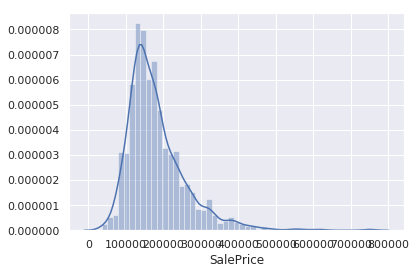

In [300]:
sns.distplot(y)

In [304]:
y = dataTrain['SalePrice']
x= dataTrain[['OverallQual','GrLivArea']]
x = sm.add_constant(x) # let's add an intercept (beta_0) to our model

model1  = sm.OLS(y,x).fit()
predictions = model1.predict(x) # make the predictions by the model

# Print out the statistics
model1.summary()
 
print_model = model1.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     1820.
Date:                Fri, 13 Dec 2019   Prob (F-statistic):               0.00
Time:                        23:23:50   Log-Likelihood:                -17630.
No. Observations:                1460   AIC:                         3.527e+04
Df Residuals:                    1457   BIC:                         3.528e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.041e+05   5045.372    -20.631      

### Regression Equation 
for Sales price = OverallQual+ GrLivArea
### Sales price = (Intercept) + (OverallQual coef)*X1 + (GrLivArea  coef)*X2
### Sales price = (-1.041e+05) + (3.285e+04)*X1 + ( 55.8622 )*X2

In [305]:
y = dataTrain['SalePrice']
x= dataTrain[['OverallQual','GrLivArea']]
x = sm.add_constant(x) # let's add an intercept (beta_0) to our model

model  = sm.OLS(y,x).fit()
predictions = model.predict(x) # make the predictions by the model

# Print out the statistics
model.summary(),model.pvalues
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     1820.
Date:                Fri, 13 Dec 2019   Prob (F-statistic):               0.00
Time:                        23:23:58   Log-Likelihood:                -17630.
No. Observations:                1460   AIC:                         3.527e+04
Df Residuals:                    1457   BIC:                         3.528e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.041e+05   5045.372    -20.631      

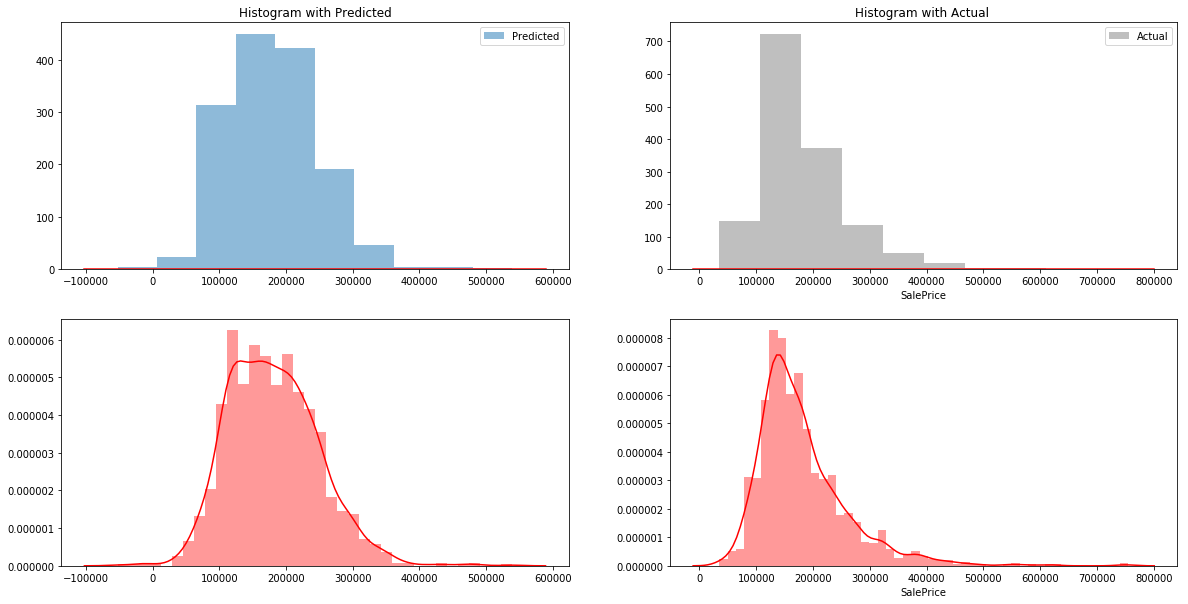

R-squared: 0.7141732234458847
Root Mean Squared Error: 42457.61476765598


In [48]:
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error , r2_score
from math import sqrt
from pylab import rcParams


regression = LinearRegression()
y = dataTrain['SalePrice']
x= dataTrain[['OverallQual','GrLivArea']]
mod= regression.fit(x,y)

y_pred = regression.predict(x)   
    
    
plot_fit_act2 (y,y_pred)

In [307]:
corrdata.head()

,SalePrice,OverallQual,YearBuilt,TotalBsmtSF,GrLivArea,GarageCars,FullBath
0,208500,7,2003,856,1710,2,2
1,181500,6,1976,1262,1262,2,2
2,223500,7,2001,920,1786,2,2
3,140000,7,1915,756,1717,3,1
4,250000,8,2000,1145,2198,3,2


In [308]:
# Convert Categorical Variable into Categorical columns
dummies_OverallQual = pd.get_dummies(corrdata['OverallQual'],drop_first=True)
dummies_YearBuilt = pd.get_dummies(corrdata['YearBuilt'],drop_first=True)
dummies_GarageCars = pd.get_dummies(corrdata['GarageCars'],drop_first=True)
reg_data = pd.concat([corrdata,dummies_OverallQual,dummies_YearBuilt],axis=1)  # not using dummies_GarageCars for reg_data
reg_data.head()
# Dropping the categorical variable and expanding them to columns for better model
reg_data = reg_data.drop(['YearBuilt','OverallQual'],axis=1)
reg_data.head()
x = reg_data.iloc[:,1:]  # Dropping 
y = reg_data['SalePrice']
# x = dataTrain.loc[:,:"SalePrice"]
x.head()


,TotalBsmtSF,GrLivArea,GarageCars,FullBath,2,3,4,5,6,7,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
0,856,1710,2,2,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1,1262,1262,2,2,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,920,1786,2,2,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
3,756,1717,3,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1145,2198,3,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [309]:
# y = reg_data['SalePrice']
# x= reg_data[['OverallQual','GrLivArea']]
x = sm.add_constant(x) # let's add an intercept (beta_0) to our model

model  = sm.OLS(y,x).fit()
predictions = model.predict(x) # make the predictions by the model

# Print out the statistics
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     49.65
Date:                Fri, 13 Dec 2019   Prob (F-statistic):               0.00
Time:                        23:24:21   Log-Likelihood:                -17285.
No. Observations:                1460   AIC:                         3.482e+04
Df Residuals:                    1335   BIC:                         3.548e+04
Df Model:                         124                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -9.508e+04   4.44e+04     -2.141      0.032   -1.82e+05   -7973.029
TotalBsmtSF    19.2175      2.833      6.782      0.000      13.659      24.776
GrLivArea      48.5282      3.017     16.085      0.000      42.610      54.447
GarageCars   1.416e+04   1798.663      7.871      0.000    1.06e+04    1.77e+04
FullBath     1601.1400   2701.832      0.593      0.554   -3699.158    6901.438
2           -3892.5755    3.4e+04     -0.115      0.909   -7.05e+04    6.27e+04
3           -7400.3473   2.79e+04     -0.265      0.791   -6.22e+04    4.74e+04
4            6150.2947   2.68e+04      0.229      0.819   -4.65e+04    5.88e+04
5            1.338e+04   2.68e+04      0.499      0.618   -3.93e+04     6.6e+04
6            2.245e+04   2.69e+04      0.834      0.405   -3.04e+04    7.53e+04
7            4.489e+04   2.71e+04      1.656      0.098   -8292.053    9.81e+04
8             8.63e+04   2.74e+04      3.152      0.002    3.26e+04     1.4e+05
9            1.566e+05    2.8e+04      5.597      0.000    1.02e+05    2.12e+05
10           1.731e+05   2.93e+04      5.909      0.000    1.16e+05    2.31e+05
1875         1.096e+05   4.98e+04      2.199      0.028    1.18e+04    2.07e+05
1880         8.627e+04   3.97e+04      2.174      0.030    8435.856    1.64e+05
1882         4.472e+04   4.98e+04      0.898      0.369    -5.3e+04    1.42e+05
1885         8.195e+04   4.35e+04      1.885      0.060   -3352.630    1.67e+05
1890         5.355e+04   4.34e+04      1.234      0.218   -3.16e+04    1.39e+05
1892         9.628e+04   4.34e+04      2.216      0.027     1.1e+04    1.82e+05
1893         5.543e+04   5.06e+04      1.094      0.274   -4.39e+04    1.55e+05
1898         3.611e+04      5e+04      0.722      0.470    -6.2e+04    1.34e+05
1900         7.633e+04   3.72e+04      2.050      0.041    3283.920    1.49e+05
1904         1.205e+05      5e+04      2.409      0.016    2.24e+04    2.19e+05
1905         1.021e+05   4.99e+04      2.044      0.041    4098.328       2e+05
1906         1.061e+05   4.99e+04      2.127      0.034    8229.032    2.04e+05
1908          1.28e+05   4.34e+04      2.951      0.003    4.29e+04    2.13e+05
1910         9.026e+04   3.65e+04      2.476      0.013    1.87e+04    1.62e+05
1911         9.672e+04   4.99e+04      1.940      0.053   -1100.330    1.95e+05
1912         7.888e+04   4.08e+04      1.934      0.053   -1112.430    1.59e+05
1913         1.142e+05   4.99e+04      2.286      0.022    1.62e+04    2.12e+05
1914         9.825e+04   3.78e+04      2.596      0.010     2.4e+04    1.72e+05
1915         9.833e+04   3.73e+04      2.638      0.008    2.52e+04    1.71e+05
1916         9.616e+04   3.76e+04      2.560      0.011    2.25e+04     1.7e+05
1917         5.821e+04      5e+04      1.164      0.245   -3.99e+04    1.56e+05
1918         1.034e+05   3.79e+04      2.73

In this approach  R^2 is .822 `

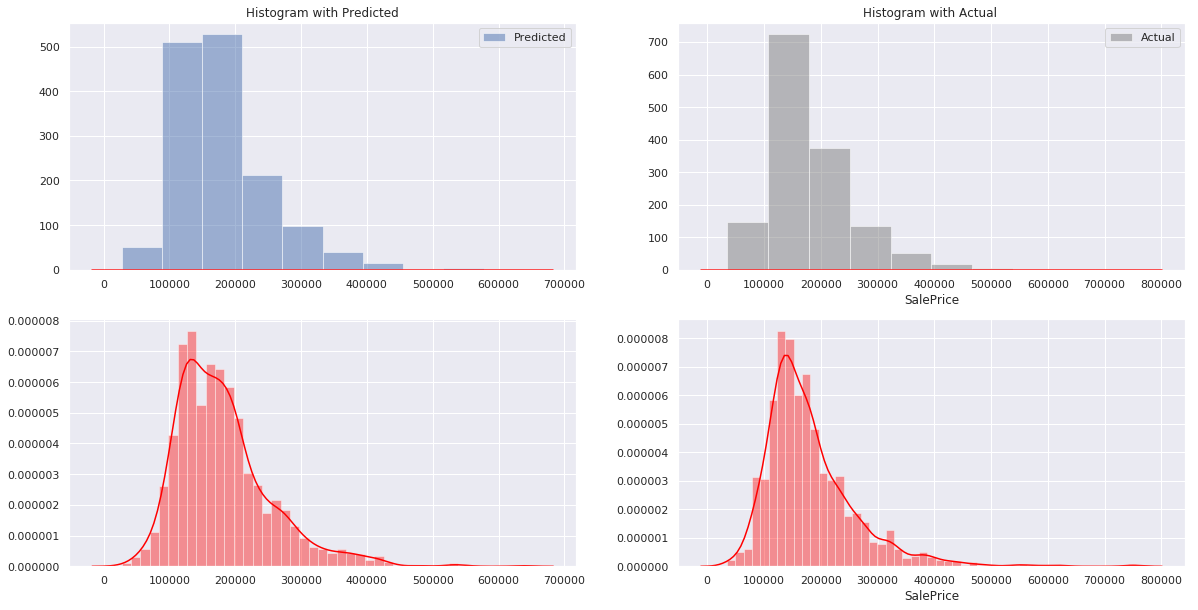

R-squared: 0.821808832587451
Root Mean Squared Error: 33523.335464233416


In [310]:
plot_fit_act2 (y,predictions)

In [311]:
# print(model.pvalues.sort_values) # P-value of all the dependent variable 

In [312]:
# Convert Categorical Variable into Categorical columns
dummies_OverallQual = pd.get_dummies(corrdata['OverallQual'],drop_first=True)
dummies_YearBuilt = pd.get_dummies(corrdata['YearBuilt'],drop_first=True)
dummies_GarageCars = pd.get_dummies(corrdata['GarageCars'],drop_first=True)
dummies_FullBath = pd.get_dummies(corrdata['FullBath'],drop_first=True)
reg_data = pd.concat([corrdata,dummies_OverallQual,dummies_YearBuilt,dummies_GarageCars,dummies_FullBath],axis=1)
reg_data.head()
# Dropping the categorical variable and expanding them to columns for better model
reg_data = reg_data.drop(['YearBuilt','OverallQual','GarageCars','FullBath'],axis=1)
reg_data.head()
x = reg_data.iloc[:,1:]  # Dropping 
y = reg_data['SalePrice']
x.head()



,TotalBsmtSF,GrLivArea,2,3,4,5,6,7,8,9,...,2008,2009,2010,1,2,3,4,1,2,3
0,856,1710,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1,1262,1262,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,920,1786,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
3,756,1717,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
4,1145,2198,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0


In [313]:
# # building Test data 
# corrdataTest = dataTest[selected_columns[1:] ] 
# corrdataTest.head()
# dummies_OverallQual = pd.get_dummies(corrdataTest['OverallQual'],drop_first=True)
# dummies_YearBuilt = pd.get_dummies(corrdataTest['YearBuilt'],drop_first=True)
# dummies_GarageCars = pd.get_dummies(corrdataTest['GarageCars'],drop_first=True)
# dummies_FullBath = pd.get_dummies(corrdataTest['FullBath'],drop_first=True)
# reg_dataTest = pd.concat([corrdataTest,dummies_OverallQual,dummies_YearBuilt,dummies_GarageCars,dummies_FullBath],axis=1)
# # Dropping the categorical variable and expanding them to columns for better model
# reg_dataTest = reg_dataTest.drop(['YearBuilt','OverallQual','GarageCars','FullBath'],axis=1)
# reg_dataTest.head()

In [314]:
x = sm.add_constant(x) # let's add an intercept (beta_0) to our model

model  = sm.OLS(y,x).fit()
predictions = model.predict(x) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     50.32
Date:                Fri, 13 Dec 2019   Prob (F-statistic):               0.00
Time:                        23:24:43   Log-Likelihood:                -17251.
No. Observations:                1460   AIC:                         3.476e+04
Df Residuals:                    1330   BIC:                         3.545e+04
Df Model:                         129                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -8.075e+04    4.4e+04     -1.835      0.067   -1.67e+05    5576.855
TotalBsmtSF    19.2190      2.783      6.907      0.000      13.760      24.678
GrLivArea      45.0405      3.009     14.967      0.000      39.137      50.944
2           -4888.8095   3.35e+04     -0.146      0.884   -7.05e+04    6.07e+04
3           -1331.6934   2.83e+04     -0.047      0.962   -5.68e+04    5.42e+04
4            1.146e+04   2.72e+04      0.421      0.674   -4.19e+04    6.48e+04
5            1.921e+04   2.74e+04      0.702      0.483   -3.45e+04    7.29e+04
6            3.106e+04   2.75e+04      1.131      0.258   -2.28e+04    8.49e+04
7            5.422e+04   2.76e+04      1.965      0.050      81.677    1.08e+05
8            8.918e+04   2.79e+04      3.198      0.001    3.45e+04    1.44e+05
9            1.521e+05   2.84e+04      5.351      0.000    9.64e+04    2.08e+05
10           1.632e+05   2.98e+04      5.471      0.000    1.05e+05    2.22e+05
1875         9.819e+04   4.88e+04      2.012      0.044    2443.039    1.94e+05
1880         7.497e+04   3.92e+04      1.914      0.056   -1863.213    1.52e+05
1882         4.665e+04   4.89e+04      0.955      0.340   -4.92e+04    1.43e+05
1885         8.064e+04   4.28e+04      1.886      0.060   -3250.804    1.65e+05
1890         5.242e+04   4.26e+04      1.230      0.219   -3.12e+04    1.36e+05
1892         9.991e+04   4.27e+04      2.341      0.019    1.62e+04    1.84e+05
1893          4.07e+04      5e+04      0.814      0.416   -5.74e+04    1.39e+05
1898         4.027e+04    4.9e+04      0.821      0.412   -5.59e+04    1.36e+05
1900          7.33e+04   3.66e+04      2.005      0.045    1576.574    1.45e+05
1904         1.226e+05   4.91e+04      2.499      0.013    2.63e+04    2.19e+05
1905         1.027e+05    4.9e+04      2.097      0.036    6613.385    1.99e+05
1906         9.639e+04    4.9e+04      1.967      0.049     281.150    1.93e+05
1908         1.093e+05   4.27e+04      2.556      0.011    2.54e+04    1.93e+05
1910         8.398e+04   3.58e+04      2.347      0.019    1.38e+04    1.54e+05
1911         8.859e+04   4.88e+04      1.815      0.070   -7186.617    1.84e+05
1912         7.259e+04      4e+04      1.817      0.069   -5782.945    1.51e+05
1913         1.046e+05   4.91e+04      2.131      0.033    8323.778    2.01e+05
1914         9.031e+04   3.71e+04      2.434      0.015    1.75e+04    1.63e+05
1915         8.714e+04   3.67e+04      2.377      0.018    1.52e+04    1.59e+05
1916         8.973e+04   3.69e+04      2.431      0.015    1.73e+04    1.62e+05
1917         5.551e+04    4.9e+04      1.132      0.258   -4.07e+04    1.52e+05
1918         9.872e+04   3.72e+04      2.653      0.008    2.57e+04    1.72e+05
1919          1.01e+05      4e+04      2.525      0.012    2.25e+04    1.79e+05
1920          8.84e+04   3.55e+04      2.49

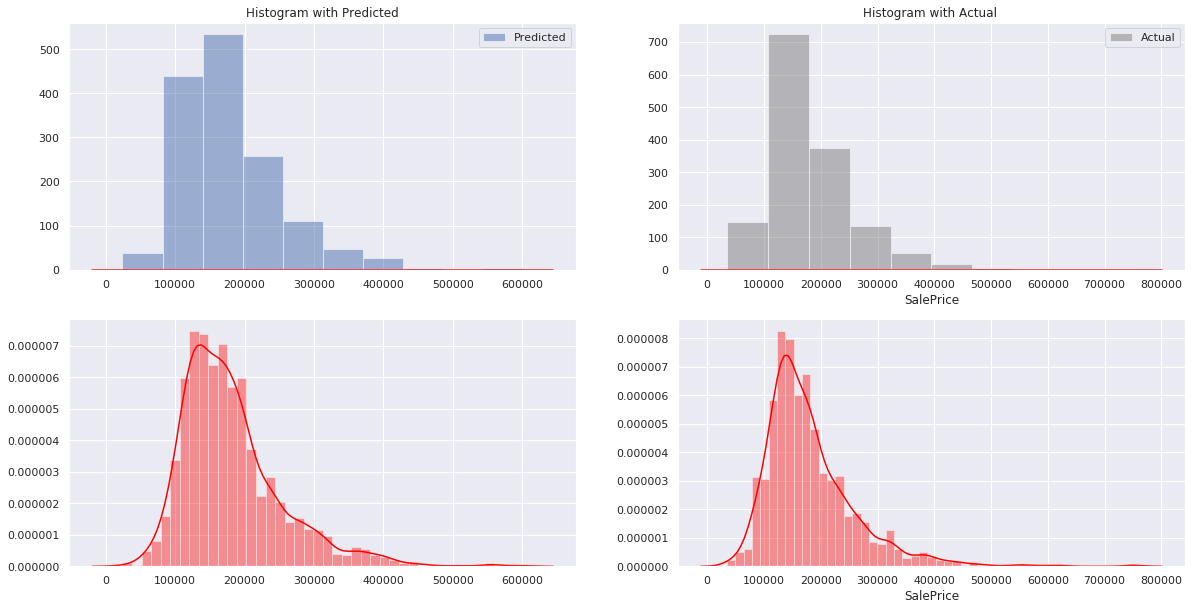

R-squared: 0.829959603060113
Root Mean Squared Error: 32747.653877319877


In [315]:
plot_fit_act2 (y,predictions)

Adjusted R^2 is now 83% , with conversion of all the categortical varible 

In [316]:
regression = LinearRegression()
mod= regression.fit(x,y)

y_pred = regression.predict(x)
MSE = mean_squared_error(np.array(y),np.array(y_pred))
print("R2",r2_score(y,y_pred))
print("MSE",MSE)
print("RMSE",sqrt(MSE))


R2 0.829959603060113
MSE 1072408834.4687437
RMSE 32747.653877319877


In [317]:
x.head()

,const,TotalBsmtSF,GrLivArea,2,3,4,5,6,7,8,...,2008,2009,2010,1,2,3,4,1,2,3
0,1.0,856,1710,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
1,1.0,1262,1262,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2,1.0,920,1786,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
3,1.0,756,1717,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
4,1.0,1145,2198,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0


#### Reported RMSE after Final Model : 32747.654 with R-squared: 0.82996

Some analysis of the model and fitted vlaue.

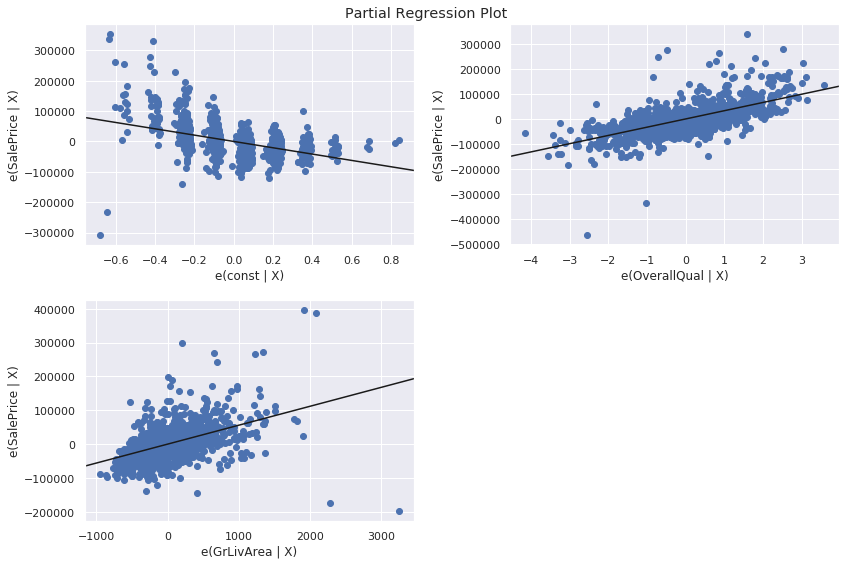

In [320]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(model1, fig=fig)

Above Plot show each Independent varaibles are sataifaying the Simaple Liner Regression. We are going plot the `fit plot` which shows where is our prediction against the actual value. 

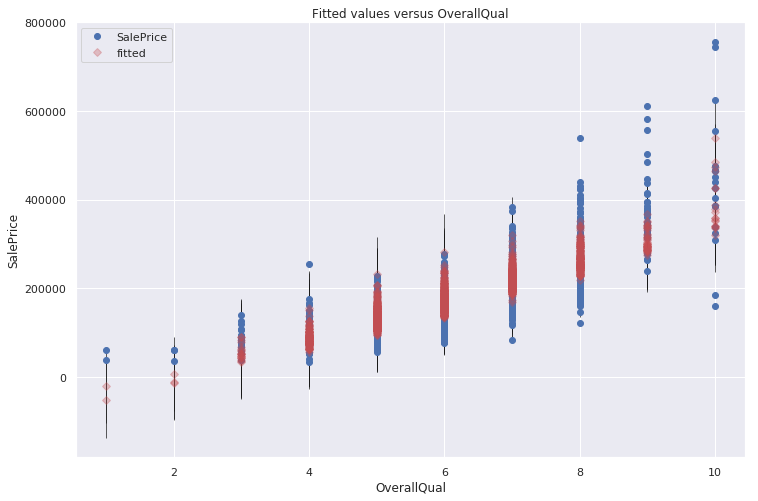

In [239]:
fig, ax = plt.subplots(figsize=(12, 8))
fig = sm.graphics.plot_fit(model, "OverallQual", ax=ax,alpha=0.3)

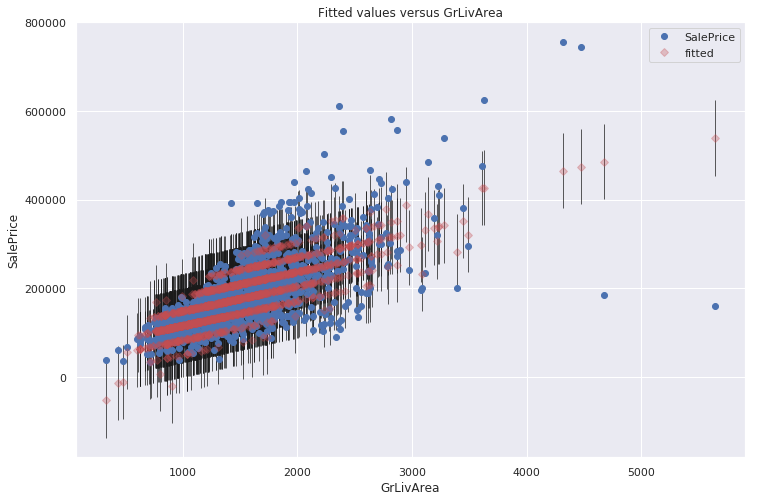

In [242]:
fig, ax = plt.subplots(figsize=(12, 8))
fig = sm.graphics.plot_fit(model, "GrLivArea", ax=ax,alpha=0.3)

Model is able to show very clearly that Overall Quality values falls in the confidance inteval of the predicaiton, with few exception. <br>
Where as for `GrLivArea`, model is able to predict within its confidence interval but as the area increases it's other factor that might be impacting the price .

#### Kaggle Submission
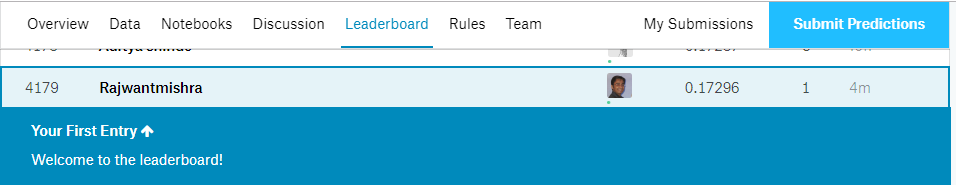

In [15]:
from statsmodels.formula.api import ols
dataTrain.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [38]:
ols_model = ols("y ~ TotalBsmtSF+(GrLivArea*OverallQual)+(GarageCars*OverallQual)+LotArea", data=dataTrain).fit()
#  'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt','LotArea']
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     861.6
Date:                Sat, 14 Dec 2019   Prob (F-statistic):               0.00
Time:                        05:15:40   Log-Likelihood:                -17347.
No. Observations:                1460   AIC:                         3.471e+04
Df Residuals:                    1452   BIC:                         3.475e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               6.83

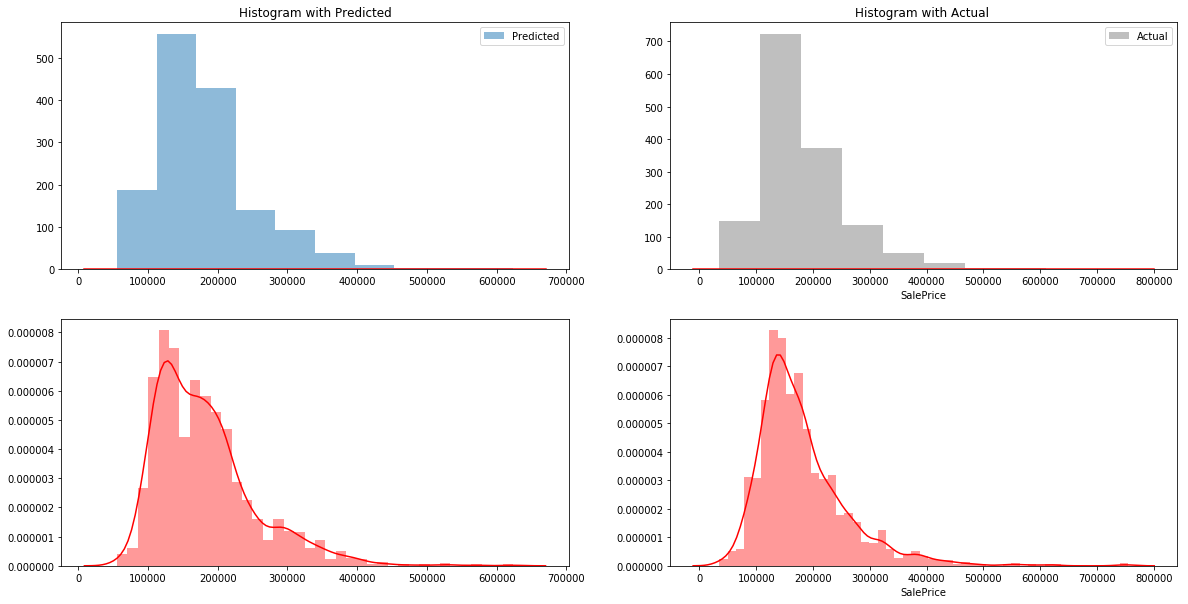

R-squared: 0.8059608902339359
Root Mean Squared Error: 34982.33329244852


In [49]:
plot_fit_act2(y,ols_model.predict(dataTrain))

In [120]:
ols_model.predict(dataTest)
# pd.concat([result,ols_model.predict(dataTrain)])
Result = pd.DataFrame(ols_model.predict(dataTest))

id = pd.DataFrame({'Id': dataTest.Id})

Result = pd.concat([id,Result],axis=1)
Result.to_csv('PropertyResult.csv')
Result.tail()


,Id,0
1454,2915,98152.755039
1455,2916,96246.039242
1456,2917,149344.370267
1457,2918,106081.955891
1458,2919,254253.788810


#### Reference :

    https://www.theanalysisfactor.com/what-is-an-exact-test/?utm_source=feedburner&utm_medium=email&utm_campaign=Feed%3A+theanalysisfactor+%28The+Analysis+Factor+Blog+Posts%29
    https://scientificallysound.org/2018/07/05/what-is-an-exact-test-an-example-using-fishers-exact-test/
    https://www.theanalysisfactor.com/chi-square-test-proportions/
    https://towardsdatascience.com/running-chi-square-tests-in-python-with-die-roll-data-b9903817c51b
    https://datatofish.com/multiple-linear-regression-python/
    https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166
    https://zhiyzuo.github.io/Pearson-Correlation-CI-in-Python/
    http://www.insightsbot.com/fitting-probability-distributions-with-python/
    https://www.statsmodels.org/dev/examples/notebooks/generated/regression_plots.html


In [121]:





# dataTest[dataTest['Id'].isnull()]
# dataTest.drop([660],axis=0,inplace=True)
# dataTest[dataTest['Id']==2121]

# dataTest[dataTest['Id'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
660,2121,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml
